In [ ]:
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a pandas DataFrame
data = pd.read_csv('/content/riceClassification.csv')
data = data.drop(columns = 'id', axis = 1)

# Split the data into features (X) and labels (y)
columns = data.columns
columns = [c for c in columns if c not in ['Class']]
y = data['Class'] 
X = data[columns]  # assuming the label column is named 'label'

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Initialize LDA with n_components=1
lda = LinearDiscriminantAnalysis(n_components=1)

# Fit the model on the dataset and transform the data onto the lower-dimensional space
X_train_lda = lda.fit_transform(X_train,y_train)
X_test_lda = lda.transform(X_test)

# Print the shape of the original and reduced feature sets
print("Original shape:", X_train.shape)
print("Reduced shape:", X_train_lda.shape)

# Initialize a logistic regression classifier and train it on the transformed training set
clf = LogisticRegression(random_state=42).fit(X_train_lda, y_train)


# Make predictions on the transformed testing set using the trained classifier
y_pred = clf.predict(X_test_lda)

# Print the accuracy of the classifier
print("Accuracy:", clf.score(X_test_lda, y_test))

report_lr_lda = classification_report(y_test, y_pred)
print(report_lr_lda)

(10911, 10)
(7274, 10)
(10911,)
(7274,)
Original shape: (10911, 10)
Reduced shape: (10911, 1)
Accuracy: 0.9891394006048941
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3262
           1       0.99      0.99      0.99      4012

    accuracy                           0.99      7274
   macro avg       0.99      0.99      0.99      7274
weighted avg       0.99      0.99      0.99      7274



[[3214   48]
 [  31 3981]]


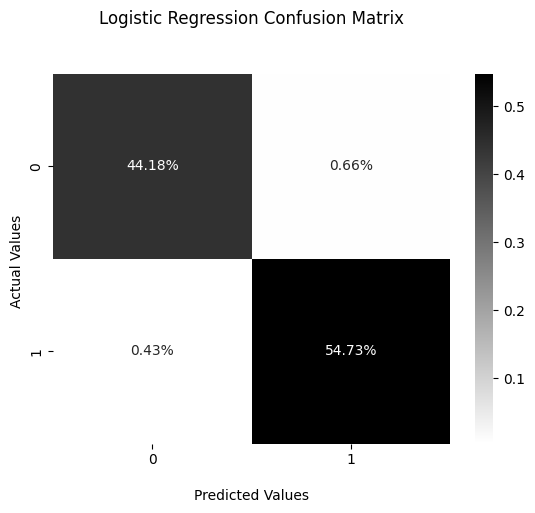

In [ ]:
#evaluation metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
#plotting Confusion Matrix
cf_matrix_lr = confusion_matrix(y_test, y_pred)
print(cf_matrix_lr)
ax = sns.heatmap(cf_matrix_lr/np.sum(cf_matrix_lr), annot=True, fmt='.2%', cmap='binary')

ax.set_title('Logistic Regression Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()